# Фрактальный анализ изображений

Автор: Винник Екатерина Петровна, 22.М04

## Теория

$$u_{\delta}(i, j) = max\{u_{\delta - 1}(i, j) + 1, \underset{|(m,n) - (x,y)| \le 1}{max} u_{\delta-1}(m,n) \}$$

$$b_{\delta}(i, j) = min\{b_{\delta - 1}(i, j) - 1, \underset{|(m,n) - (x,y)| \le 1}{min} b_{\delta-1}(m,n) \}$$

В результате, можно посчитать объем на шаге $\delta$ следующим образом:

$$Vol_{\delta} = \sum (u_{\delta}(i, j) - b_{\delta}(i, j))$$

Отсюда площадь поверхности можно вычислить как:
$$A_{\delta} = \dfrac{Vol_{\delta}}{2\delta} $$
$$A_{\delta} = \dfrac{Vol_{\delta} - Vol_{\delta-1}}{2\delta} $$

## Подготовка изображений

In [1]:
import numpy as np
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from scipy.ndimage import generic_filter

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Загрузим изображение для дальнейшей обработки.

In [2]:
img_1 = Image.open('./Img1.jpg')
img_2 = Image.open('./Img2.jpg')
img_3 = Image.open('./Img3.jpg')

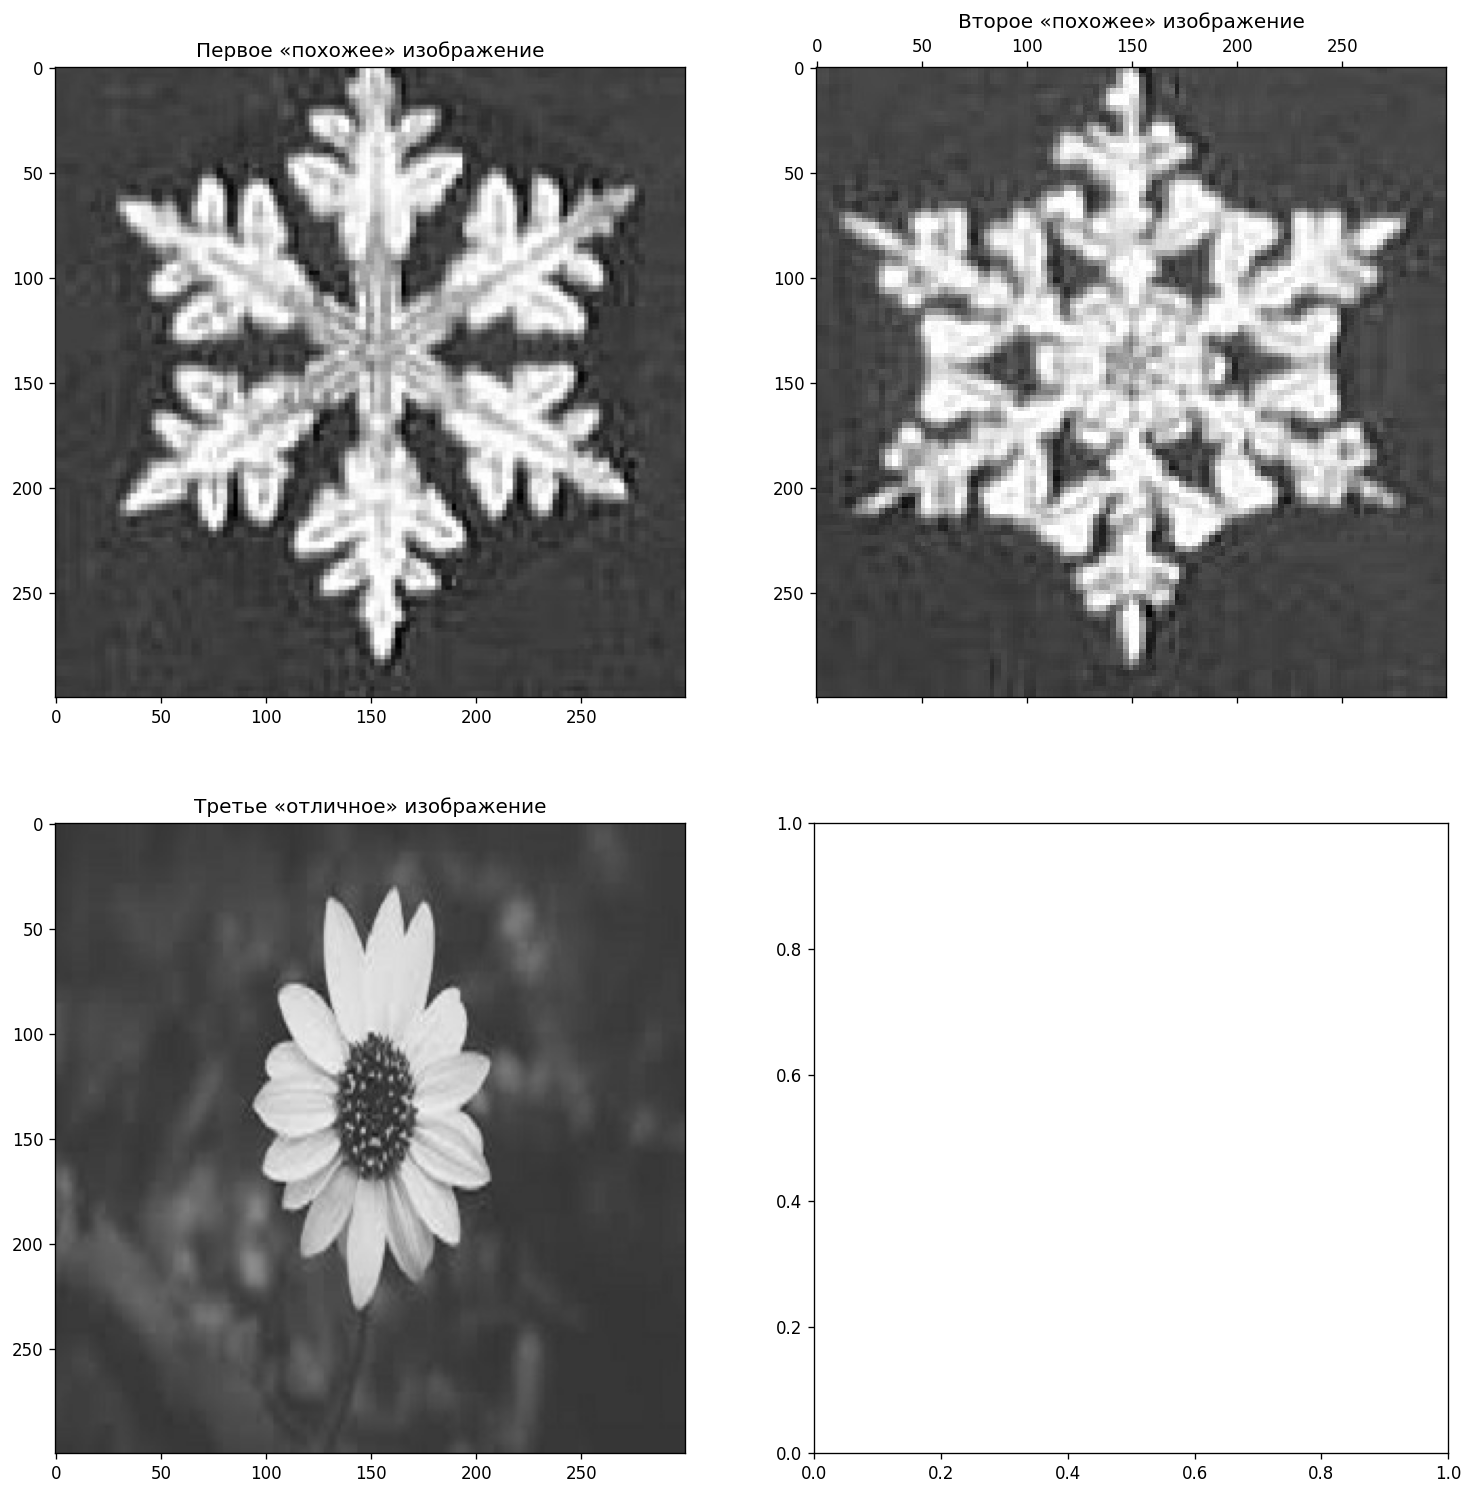

In [3]:
from PIL import Image

fig, axs = plt.subplots(2, 2, figsize=(15, 15), dpi=120)
axs[0, 0].imshow(img_1, cmap='gray')
axs[0, 0].set_title('Первое «похожее» изображение')
axs[0, 1].matshow(img_2, cmap='gray')
axs[0, 1].set_title('Второе «похожее» изображение')
axs[1, 0].imshow(img_3, cmap='gray')
axs[1, 0].set_title('Третье «отличное» изображение')
plt.show()

In [4]:
imar1 = np.array(img_1, dtype=np.int16)
imar2 = np.array(img_2, dtype=np.int16)
imar3 = np.array(img_3, dtype=np.int16)

imar1 = np.sum(imar1, axis=2) // 3
imar2 = np.sum(imar2, axis=2) // 3
imar3 = np.sum(imar3, axis=2) // 3

In [5]:
print(imar1.shape, ";", imar2.shape, ";", imar3.shape)

(300, 300) ; (300, 300) ; (300, 300)


In [6]:
from scipy.ndimage.filters import maximum_filter, minimum_filter, generic_filter

## Реализация

In [7]:
def get_delta_surfaces_by_fst_method(imar, d_=10):
    u = imar.copy()
    b = imar.copy()

    footprint=np.array([[0, 1, 0],
                        [1, 0, 1],
                        [0, 1, 0]])
    ds = range(1, d_)
    vols = []

    for d in ds:
        fst_u = u + 1
        fst_b = b - 1

        scnd_u = maximum_filter(u, mode='constant', footprint=footprint, cval=0)
        scnd_b = minimum_filter(b, mode='constant', footprint=footprint, cval=255)

        u = np.maximum(fst_u, scnd_u)
        b = np.minimum(fst_b, scnd_b)

        vols.append(np.sum(u - b))
    return vols[-1] / (2.0 * d)

In [8]:
def get_delta_surfaces_by_snd_method(imar, d_=10):
    u = imar.copy()
    b = imar.copy()

    footprint=np.array([[0, 1, 0],
                        [1, 0, 1],
                        [0, 1, 0]])
    ds = range(1, d_)
    vols = []

    for d in ds:
        fst_u = u + 1
        fst_b = b - 1

        scnd_u = maximum_filter(u, mode='constant', footprint=footprint, cval=0)
        scnd_b = minimum_filter(b, mode='constant', footprint=footprint, cval=255)

        u = np.maximum(fst_u, scnd_u)
        b = np.minimum(fst_b, scnd_b)

        vols.append(np.sum(u - b))
    return (vols[-1] - vols[-2]) / 2

## Обработка изображений и анализ

In [9]:
deltas = range(3,13)

surfaces1_img1 = []
for d in deltas:
    surfaces1_img1.append(get_delta_surfaces_by_fst_method(imar1, d))

surfaces1_img2 = []
for d in deltas:
    surfaces1_img2.append(get_delta_surfaces_by_fst_method(imar2, d))

surfaces1_img3 = []
for d in deltas:
    surfaces1_img3.append(get_delta_surfaces_by_fst_method(imar3, d))  
    
surfaces2_img1 = []
for d in deltas:
    surfaces2_img1.append(get_delta_surfaces_by_snd_method(imar1, d))

surfaces2_img2 = []
for d in deltas:
    surfaces2_img2.append(get_delta_surfaces_by_snd_method(imar2, d))

surfaces2_img3 = []
for d in deltas:
    surfaces2_img3.append(get_delta_surfaces_by_snd_method(imar3, d))  

In [10]:
from math import log

deltas_logs = [log(y,2) for y in deltas]
deltas_logs

[1.5849625007211563,
 2.0,
 2.321928094887362,
 2.584962500721156,
 2.807354922057604,
 3.0,
 3.1699250014423126,
 3.3219280948873626,
 3.4594316186372978,
 3.5849625007211565]

In [11]:
surfaces1_logs_1 = [log(y,2) for y in surfaces1_img1]
surfaces1_logs_2 = [log(y,2) for y in surfaces1_img2]
surfaces1_logs_3 = [log(y,2) for y in surfaces1_img3]

surfaces2_logs_1 = [log(y,2) for y in surfaces2_img1]
surfaces2_logs_2 = [log(y,2) for y in surfaces2_img2]
surfaces2_logs_3 = [log(y,2) for y in surfaces2_img3]

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

d11 = {'deltas': deltas_logs, 'surface area': surfaces1_logs_1, 'image': 'image1', 'method':'Method1'}
df11 = pd.DataFrame(data=d11)
d12 = {'deltas': deltas_logs, 'surface area': surfaces1_logs_2, 'image': 'image2', 'method':'Method1'}
df12 = pd.DataFrame(data=d12)
d13 = {'deltas': deltas_logs, 'surface area': surfaces1_logs_3, 'image': 'image3', 'method':'Method1'}
df13 = pd.DataFrame(data=d13)

d21 = {'deltas': deltas_logs, 'surface area': surfaces2_logs_1, 'image': 'image1', 'method':'Method2'}
df21 = pd.DataFrame(data=d21)
d22 = {'deltas': deltas_logs, 'surface area': surfaces2_logs_2, 'image': 'image2', 'method':'Method2'}
df22 = pd.DataFrame(data=d22)
d23 = {'deltas': deltas_logs, 'surface area': surfaces2_logs_3, 'image': 'image3', 'method':'Method2'}
df23 = pd.DataFrame(data=d23)


df = pd.concat([df11, df12, df13, df21, df22, df23], ignore_index=True)
df


,deltas,surface area,image,method
0,1.584963,19.724342,image1,Method1
1,2.000000,19.584057,image1,Method1
2,2.321928,19.470323,image1,Method1
3,2.584963,19.371700,image1,Method1
4,2.807355,19.285697,image1,Method1
5,3.000000,19.209220,image1,Method1
6,3.169925,19.139197,image1,Method1
7,3.321928,19.074116,image1,Method1
8,3.459432,19.012757,image1,Method1
9,3.584963,18.954754,image1,Method1


<AxesSubplot: xlabel='deltas', ylabel='surface area'>

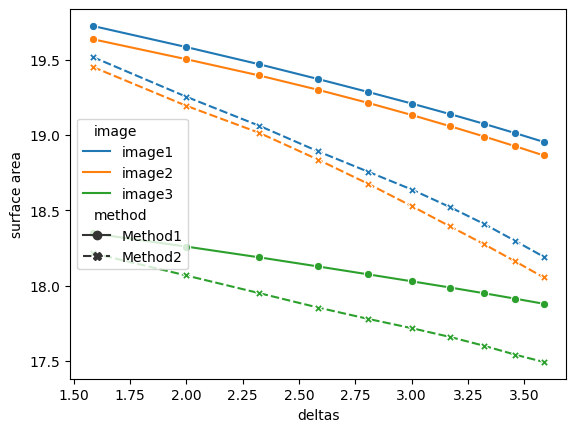

In [13]:
sns.lineplot(data=df, x='deltas', y='surface area', hue='image', style='method', markers=True)

Из графиков видно:
- Графики «похожих» изображений расположены ближе друг к другу относительно графика «отличного» изображения;
- С возрастанием $\delta$ уменьшается значение $A_\delta$, причём для обеих формул.